![rbf_nn](https://www.researchgate.net/publication/335059192/figure/fig5/AS:941473092599830@1601476085646/The-structure-of-a-radial-basis-function-RBF-neural-network-to-model-absorption.png)
____

<font size=+3 color=#AA55FF> HW 7: Neural Networks I </font>

____

____

<font color=#55FFAA> Problem 1: Project Feedback (10 Points) </font>
____

Access the feedback you received on your project and read the feedback carefully. In a markdown cell, give a summary of what you learned. 

Add to that discussion where you think you are with your project:
* do you think you have a good plan now?
* do you think you have a clear goal?
* do you think your dataset supports your goal?
* do you think your project is different from the weekly HW assignments?
* think through Appendix A carefully and list areas where you are still weak

We are heading into the middle of the semester, so there is still time to completely change your project if you need to. 

Do you need to? Or, are you on track?


---
* Do you think you have a good plan now?

Yes, the plan appears well-structured and comprehensive. It covers all necessary aspects from data collection to model evaluation. It outlines the methodology, implementation tools, metrics for success, and potential risks and challenges. The plan also includes considerations for ethical concerns.

* Do you think you have a clear goal?

Yes, the goal is clear: to develop a deep learning model for EEG artifact removal, aiming to improve the reliability and interpretability of EEG data analysis. The project aims to contribute to advancements in EEG signal processing and neuroscientific research, ultimately enhancing our understanding of the brain and facilitating the development of new diagnostic and therapeutic tools for neurological disorders.

* Do you think your dataset supports your goal?

Yes, the dataset chosen (EEGdenoiseNet repository) it is appropriate for the goal of EEG artifact removal. It provides both clean EEG data and data contaminated with eye artifacts, which aligns well with the project's objective. However, it's important to ensure that the dataset is diverse enough to capture various artifact types and scenarios.

* do you think your project is different from the weekly HW assignments?

Yes, the project differs from the weekly homework assignments in that it extends beyond the scope of what was specifically taught in class. While the project leverages the foundational knowledge and techniques learned in class, such as  data preprocessing methods, the specific neural network architecture, such as the diffusion model approach, is not part of the standard curriculum. This aspect represents a departure from the typical assignments, as it involves applying advanced techniques that require additional independent research and experimentation.

* think through Appendix A carefully and list areas where you are still weak

Yes, One potential weakness could be in the detailed implementation plan. While it's mentioned that the project will be implemented using Python and PyTorch, more specifics on the algorithms, network architectures, and hyperparameter tuning strategies could enhance the clarity of the plan.

Overall, while the plan seems solid, refining part I mentioned above could further strengthen the project. Whether a complete overhaul is necessary would depend on the significance of these weaknesses and the project's progress relative to the timeline. If these weaknesses pose significant limitations or if progress has been slow, it might be worth considering adjustments to the project plan. I actually finished all the crucial part of the project ( like preprocessing the data and train the network), but I still need to summarize the results.

____

<font color=#55FFAA> Problem 2: Linear Artificial Neural Network (15 Points) </font>
____

Linear neural networks are easy to analyze mathematically. For a given input **x** and output _y_, write down _y_ in terms of **x**. Use $\LaTeX$ in a markdown cell. It'll look something like:

$$y = w_0 + \ldots $$

Start with a simple feed forward ANN with one hidden layer. How many weights do you need to train? (Write in terms of the dimensions of the input and width of the hidden layer.) 

Next, add a second hidden layer. Now, how many weights do you need to train? 

Next, add a third layer, and do it again.....

Next, add a fourth layer....you get the idea: how many weights do you need to train for a given number of hidden layers? 

Be sure to look at the equations very carefully. This problem is in some sense a "trick question". What is the trick? 

---

Based what I leant in the textbook. First answer 'How many weights do you need to train?':

$$ y = w_0 + \sum_{i=1}^N w_i \sigma(w_i^Tx+b_i)$$

where:
* N is the number of neurons in the hidden layer,
* x is the input vector,
* w_i are the weights connecting the input to the hidden layer,
* b_i are the biases of the hidden layer neurons, and
* $\sigma$ is the activation function applied element-wise.

Number of weights=(input dimensions)×(number of neurons in the hidden layer)+(number of neurons in the hidden layer)×(output dimensions)

If the input dimension $n_{input}$ is 3 and there is one hidden layer with 2 neurons(N=2), and assuming the output dimension $n_{output}$ is also 1, then the number of weights to train would be:
$$ Number of weights=3×2+2×1=6+2=8$$
So, in this case, you would need 8 weights to train the neural network.


Second, if I add one more layer: 

Number of weights=(input dimensions)×(number of neurons in the first hidden layer)+(number of neurons in the first hidden layer)×(number of neurons in the second hidden layer)+(number of neurons in the second hidden layer)×(output dimensions)

$$ Number of weights=3×2+2×2+2×1=6+4+2=12 $$

Third, and Forth and final:

$$ Number of weights=n_{input} * N + \sum_{i=1}^L(N*N) + N*n_{output}$$

where: 

* L is the number of layer and N is the neurons

Here, the summation term accounts for the weights between each pair of consecutive hidden layers.

The trick is that the number of weights between hidden layers is dependent only on the number of neurons in each layer, not on the total number of layers. Therefore, adding more layers does not increase the number of weights associated with the connections between layers.

If we consider $L$ hidden layers and apply this formula, we find that the number of weights associated with the connections between layers remains constant, regardless of the number of layers.



____

<font color=#55FFAA> Problem 3: Radial Basis Function Neural Networks (25 Points) </font>
____

You are all very expert in curve fitting to any functional form as long as the model is linear in the weights. Let's practice that a bit more by exploring radial basis function neural networks (RBF-NNs) _in 2D this time_. 

See the image at the top of this notebook.

The RBF-NN function is given here in its Gaussian form:

$$z({\bf x}) = \sum_c w_c \exp\left(-({\bf x} - {\bf x}_c)^2/(2L^2) \right) ,$$

where ${\bf x}_c$ is a vector in 2D, given in terms of $(x,y)$ coordinate pairs, which are given with their value $z$ at that point.

This code generates the data:


In [5]:
import numpy as np
import matplotlib.pyplot as plt


x = np.random.rand(10) * 10 # vary size of dataset
y = np.random.rand(10) * 10
z = np.sin(1*x) + np.cos(2*y) # vary this function as well

Set up the matrix equations, find the weights using only the Moore-Penrose pseudoinverse and plot the data and the prediction in 2D using `scatter` and `imshow`. 

To save you some time, I am going to _**cheat**_ and use a canned library for this so that you can see what you are after. Run this code and comment each line if you use any of it. What you should see are the data as points, colored by $z$ value and the interpolated values at any $(x,y)$ below that. 

Vary the number of data points from about $10$ to over $1000$ to see how well you can predict the actual surface as a function of the number of data points. 

What does $L$ do? 

Text(0.5, 1.0, 'RBF-NN Interpolation')

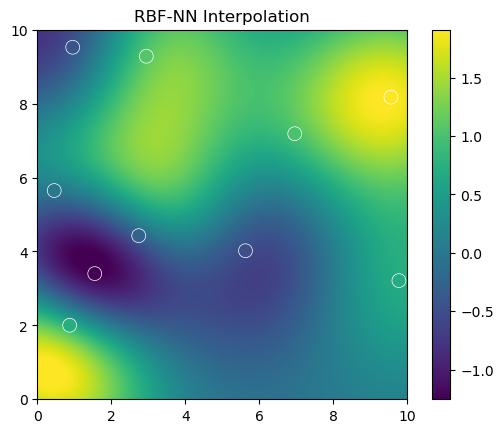

In [10]:
from scipy.interpolate import Rbf # don't do this!!@

rbf = Rbf(x, y, z, function='gaussian') # cheating here!!

xi, yi = np.mgrid[0:10:1000j, 0:10:1000j]
zi = rbf(xi, yi)

fig, ax = plt.subplots()
ax.scatter(y, x, 100, z, edgecolor='w', lw=0.5)
pos = ax.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
           extent=[0, 10, 0, 10], interpolation='nearest')
fig.colorbar(pos, ax=ax)
ax.set_title('RBF-NN Interpolation')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# Define a function to generate random data points
def generate_data(num_points):
    x = np.random.rand(num_points) * 10
    y = np.random.rand(num_points) * 10
    z = np.sin(1 * x) + np.cos(2 * y)
    return x, y, z

# Define a function to perform RBF interpolation and plot the results
def interpolate_and_plot(x, y, z):
    rbf = Rbf(x, y, z, function='gaussian')
    xi, yi = np.mgrid[0:10:1000j, 0:10:1000j]
    zi = rbf(xi, yi)
    
    fig, ax = plt.subplots()
    ax.scatter(y, x, 100, z, edgecolor='w', lw=0.5)
    pos = ax.imshow(zi, vmin=z.min(), vmax=z.max(), origin='lower',
                    extent=[0, 10, 0, 10], interpolation='nearest')
    fig.colorbar(pos, ax=ax)
    ax.set_title(f'RBF-NN Interpolation ({len(x)} data points)')
    plt.show()

# Vary the number of data points from 10 to 1000
num_data_points = [10, 100, 1000]

for num_points in num_data_points:
    x, y, z = generate_data(num_points)
    interpolate_and_plot(x, y, z)


The variable $L$ in the Gaussian RBF function controls the "width" of the basis functions. It determines the scale over which nearby data points will influence the interpolated values. Larger values of $L$  result in smoother interpolations, while smaller values allow for more localized effects. Adjusting $L$ effectively controls the level of smoothness in the interpolation.







____

<font color=#55FFAA> Problem 4: Combining Scikit-Learn and Tensorflow (20 Points) </font>
____

Figure out what this code does and comment (nearly) every line. 

Answer these questions:
* how well do these libraries work together? for example, what Python datatype is used in `sklearn` and was there any preprocessing before it was used in `tensorflow`?
* from the docs, what is the `validation_split`?
* what NN architecture is being used here, and what would be its general application area?

Make a plot of the test loss versus epoch for a variety of cases:
* different hidden layers: both number of layers and width of layer
* activation functions

What trends does your plot reveal? 

Do you think you should scale your data? 

* how well do these libraries work together? for example, what Python datatype is used in sklearn and was there any preprocessing before it was used in tensorflow?

The combination of scikit-learn and TensorFlow works well together. Scikit-learn primarily uses NumPy arrays for data, which are compatible with TensorFlow. Data preprocessing steps, like scaling or encoding, can be done in scikit-learn before feeding the data into TensorFlow models. The integration allows leveraging scikit-learn for preprocessing and TensorFlow for building and training deep learning models, streamlining the machine learning pipeline.

* from the docs, what is the validation_split?

validation_split is a parameter used during model training to automatically set aside a portion of the training data for validation. It specifies the fraction of data to be used for validation, helping to monitor model performance and prevent overfitting.



* what NN architecture is being used here, and what would be its general application area?

The neural network architecture used here is a simple feedforward neural network (FNN) with two hidden layers, each containing 64 neurons and using the ReLU activation function. It's commonly used for regression tasks, such as predicting continuous values. In this specific example, it's applied to predict diabetes progression based on input features.










In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import tensorflow as tf

diabetes_data = load_diabetes()
X, y = diabetes_data.data, diabetes_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=5, validation_split=0.2, verbose=1)

loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")


2024-02-22 23:42:31.058491: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 23:42:31.469034: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 23:42:31.469172: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 23:42:31.469701: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 23:42:31.684680: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 23:42:43.977609: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT

Epoch 1/5
9/9 [==============================] - 1s 25ms/step - loss: 31517.8750 - val_loss: 22469.0352
Epoch 2/5
9/9 [==============================] - 0s 5ms/step - loss: 31489.4395 - val_loss: 22441.1348
Epoch 3/5
9/9 [==============================] - 0s 5ms/step - loss: 31449.2383 - val_loss: 22399.7461
Epoch 4/5
9/9 [==============================] - 0s 5ms/step - loss: 31387.6211 - val_loss: 22336.8242
Epoch 5/5
3/3 [==============================] - 0s 3ms/step - loss: 26276.0762
Test Loss: 26276.076171875


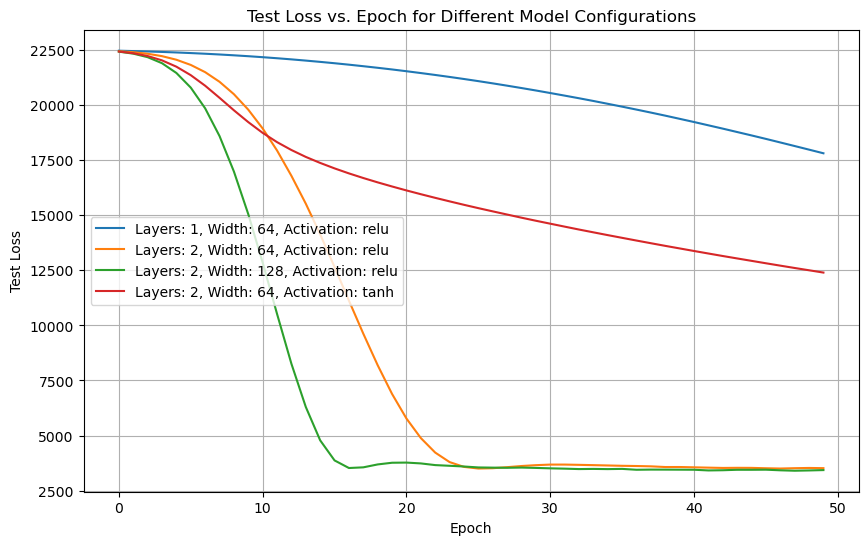

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and split the data
diabetes_data = load_diabetes()
X, y = diabetes_data.data, diabetes_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define different configurations
configurations = [
    {'hidden_layers': 1, 'width': 64, 'activation': 'relu'},
    {'hidden_layers': 2, 'width': 64, 'activation': 'relu'},
    {'hidden_layers': 2, 'width': 128, 'activation': 'relu'},
    {'hidden_layers': 2, 'width': 64, 'activation': 'tanh'},
]

# Train models and record test loss
test_losses = []
for config in configurations:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(config['width'], activation=config['activation'], input_shape=(X_train.shape[1],)))
    for _ in range(config['hidden_layers'] - 1):
        model.add(tf.keras.layers.Dense(config['width'], activation=config['activation']))
    model.add(tf.keras.layers.Dense(1))
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)
    test_losses.append(history.history['val_loss'])

# Plot test loss versus epoch for each configuration
plt.figure(figsize=(10, 6))
for i, config in enumerate(configurations):
    plt.plot(test_losses[i], label=f'Layers: {config["hidden_layers"]}, Width: {config["width"]}, Activation: {config["activation"]}')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.title('Test Loss vs. Epoch for Different Model Configurations')
plt.legend()
plt.grid(True)
plt.show()


Regarding scaling the data, it's generally a good practice to scale the input features, especially when using activation functions like ReLU or tanh, as they can be sensitive to the scale of the input data. Therefore, scaling the data might improve the model's performance and convergence speed. We can use techniques like normalization or standardization to scale the input features.
